In [1]:
import numpy as np

from functools import cmp_to_key
from Parameters import *
from SMO import *
from HW4Utils import *

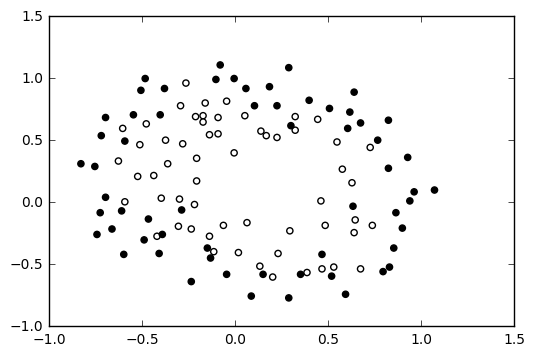

In [2]:
data = getData("chips.txt")
showData(data)
data = data[['x', 'y', 'class']].as_matrix()

In [3]:
def svmTrainImlementation(trainSet, testSet, p):
    answer = []
    solution = SMO().solve(trainSet, p)
    for testPoint in testSet:
        f = 0.0
        for i in range(len(trainSet)):
            point = trainSet[i]
            value = -1 if point[-1] == 0 else 1
            f += solution.alphas[i] * value * p.kernel[0](point[:-1], testPoint[:-1])
        f += solution.b
        answer.append([testPoint[0], testPoint[1], 1 if f >= 0 else 0])
    return answer

In [4]:
def svmTrainIter(data, p):
    foldsCount = 5
    averageAccuracy = 0
    cv = kFold(len(data), foldsCount, shuffle=True)
    for train_index, test_index in cv:
        trainSet = [data[i] for i in train_index]
        testSet = [data[i] for i in test_index]
        classifierAnswers = svmTrainImlementation(trainSet, testSet, p)
        accuracy = f1_score([point[2] for point in testSet], [point[2] for point in classifierAnswers])
        averageAccuracy += accuracy
    averageAccuracy /= foldsCount
    return averageAccuracy

In [5]:
kernels = [(linear_kernel, 'linear kernel'), (polynomial_kernel, 'polynomial kernel (d=3)'), 
           (lambda x, y: polynomial_kernel(x, y, 4), 'polynomial kernel (d=4)'), (rbf_kernel, 'radial basis (g=5)'),
           (lambda x, y: rbf_kernel(x, y, 10), 'radial basis (g=10)')]
def svmTrain(data):
    results = []
    for kernel in kernels:
        for c in [2 ** (-3), 2, 2 ** 3]:
            for tol in [10 ** (-3)]:
                for eqItersCount in [3, 5]:
                    p = Parameters(kernel, 0.0, c, tol, eqItersCount)
                    p.f1_score = svmTrainIter(data, p)
                    results.append(p)
    return results

In [6]:
results = svmTrain(data)

In [7]:
results = sorted(results, key=cmp_to_key(lambda r1, r2: r2.f1_score - r1.f1_score))
maxLen = min(len(results), 50)
results = results[:maxLen]

statistics = pd.DataFrame(columns=['Kernel', 'C', 'Tol', 'eqItersCount', 'f1_score'])
for res in results:
    newStat = pd.DataFrame([[res.kernel[1], res.c, res.tol, res.eqItersCount, res.f1_score]], columns=['Kernel', 'C', 'Tol', 'eqItersCount', 'f1_score'])
    statistics = statistics.append(newStat, ignore_index=True)

In [8]:
statistics

,Kernel,C,Tol,eqItersCount,f1_score
0,polynomial kernel (d=3),2.000,0.001,5.0,0.825588
1,polynomial kernel (d=4),2.000,0.001,3.0,0.816296
2,polynomial kernel (d=4),8.000,0.001,5.0,0.814788
3,polynomial kernel (d=4),2.000,0.001,5.0,0.811188
4,polynomial kernel (d=3),8.000,0.001,5.0,0.808011
5,radial basis (g=5),8.000,0.001,3.0,0.807610
6,polynomial kernel (d=3),8.000,0.001,3.0,0.804026
7,radial basis (g=5),2.000,0.001,3.0,0.801059
8,polynomial kernel (d=3),2.000,0.001,3.0,0.800839
9,polynomial kernel (d=4),8.000,0.001,3.0,0.799890
